In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Distribution of physical activity level (PAL) in Wave 1

## PAL per child

In [2]:
# Read data
fitbit_new = pd.read_csv('../data/Fitbit_Imputation_FINAL.csv', sep=';', header=0)
steps_mean_wave_new = fitbit_new.groupby(['Child', 'Wave']).mean()['Steps'].reset_index()
steps_mean_wave_new.Steps = steps_mean_wave_new.Steps * 0.0001
steps_mean_wave_new = steps_mean_wave_new.pivot(index='Child', columns='Wave')['Steps']

In [5]:
# Descriptives of dataset
steps_wave1 = steps_mean_wave_new[1]
PAL_wave1 = steps_wave1.dropna()
PAL_wave1.describe()

count    926.000000
mean       0.916652
std        0.343573
min        0.123467
25%        0.673142
50%        0.887773
75%        1.105740
max        2.246200
Name: 1, dtype: float64

## Frequency distribution

(array([ 4.,  2.,  2.,  5.,  9., 15., 14., 15., 17., 25., 34., 40., 54.,
        53., 38., 47., 38., 51., 64., 38., 40., 40., 44., 21., 26., 28.,
        27., 19., 20., 14., 20.,  5., 10.,  5.,  6.,  8.,  4.,  3.,  5.,
         1.,  2.,  2.,  2.,  1.,  3.,  0.,  2.,  1.,  0.,  2.]),
 array([0.12346667, 0.16592133, 0.208376  , 0.25083067, 0.29328533,
        0.33574   , 0.37819467, 0.42064933, 0.463104  , 0.50555867,
        0.54801333, 0.590468  , 0.63292267, 0.67537733, 0.717832  ,
        0.76028667, 0.80274133, 0.845196  , 0.88765067, 0.93010533,
        0.97256   , 1.01501467, 1.05746933, 1.099924  , 1.14237867,
        1.18483333, 1.227288  , 1.26974267, 1.31219733, 1.354652  ,
        1.39710667, 1.43956133, 1.482016  , 1.52447067, 1.56692533,
        1.60938   , 1.65183467, 1.69428933, 1.736744  , 1.77919867,
        1.82165333, 1.864108  , 1.90656267, 1.94901733, 1.991472  ,
        2.03392667, 2.07638133, 2.118836  , 2.16129067, 2.20374533,
        2.2462    ]),
 <BarContainer

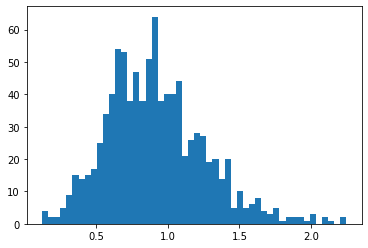

In [6]:
plt.hist(PAL_wave1, bins=50)

## Cumulative distribution

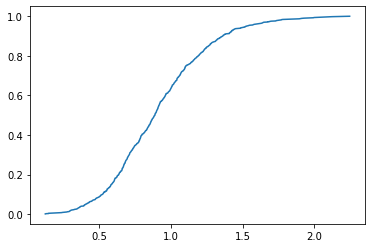

In [8]:
ecdf = ECDF(PAL_wave1)
plt.plot(ecdf.x, ecdf.y)

## Save plots

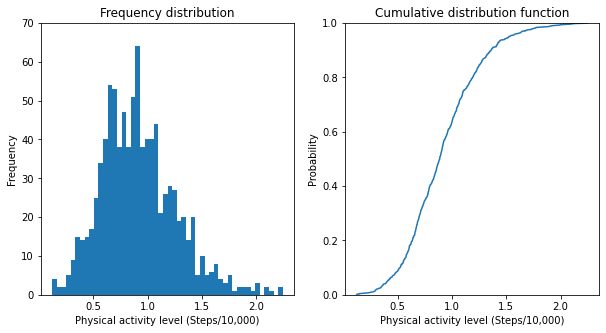

In [9]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Frequency distribution')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Physical activity level (Steps/10,000)')
ax1.set_ylim([0, 70])
ax1.hist(PAL_wave1, bins=50)

ax2.set_title('Cumulative distribution function')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Physical activity level (Steps/10,000)')
ax2.set_ylim([0, 1])
ax2.plot(ecdf.x, ecdf.y)


fig.savefig('../output/plots/pal_w1_dist.eps', bbox_inches='tight', format='eps', dpi=1000)
